In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# CSV ÌååÏùºÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÏùΩÍ∏∞
data_red = pd.read_csv(url_red, sep=';')
data_white = pd.read_csv(url_white, sep=';')

# Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
data_red['type'] = 'red'
data_white['type'] = 'white'
data = pd.concat([data_red, data_white], axis=0)

# ÌäπÏÑ±Í≥º Î†àÏù¥Î∏î Î∂ÑÎ¶¨
X = data.drop(columns=['type', 'quality'])
y = data['quality']

# Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


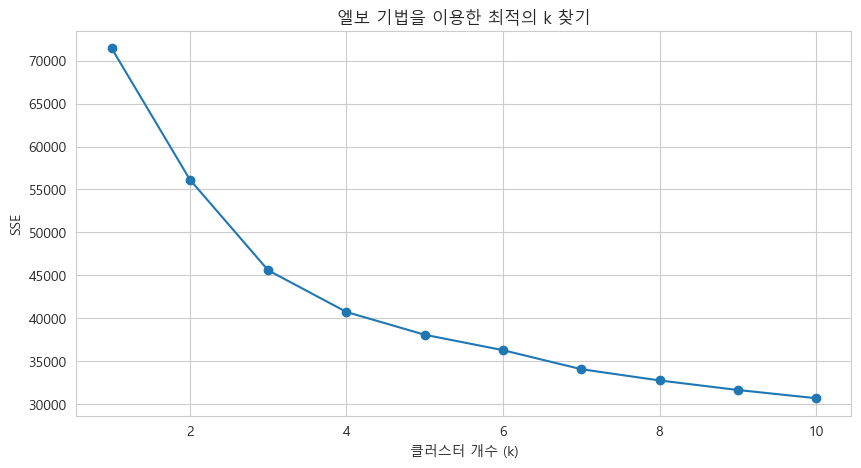

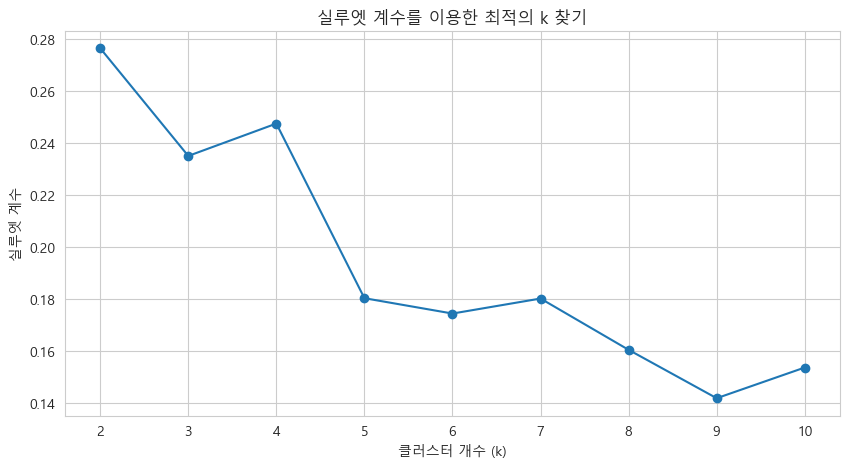

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.font_manager as fm

# Ìè∞Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path= "C:/Windows/Fonts/malgun.ttf"  # 'ÎßëÏùÄ Í≥†Îîï' Ìè∞Ìä∏ Í≤ΩÎ°ú
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family=font_prop.get_name())

# ÏùåÏàò Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

# ÏóòÎ≥¥ Í∏∞Î≤ï
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò (k)')
plt.ylabel('SSE')
plt.title('ÏóòÎ≥¥ Í∏∞Î≤ïÏùÑ Ïù¥Ïö©Ìïú ÏµúÏ†ÅÏùò k Ï∞æÍ∏∞')
plt.show()

# Ïã§Î£®Ïó£ Í≥ÑÏàò
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò (k)')
plt.ylabel('Ïã§Î£®Ïó£ Í≥ÑÏàò')
plt.title('Ïã§Î£®Ïó£ Í≥ÑÏàòÎ•º Ïù¥Ïö©Ìïú ÏµúÏ†ÅÏùò k Ï∞æÍ∏∞')
plt.show()


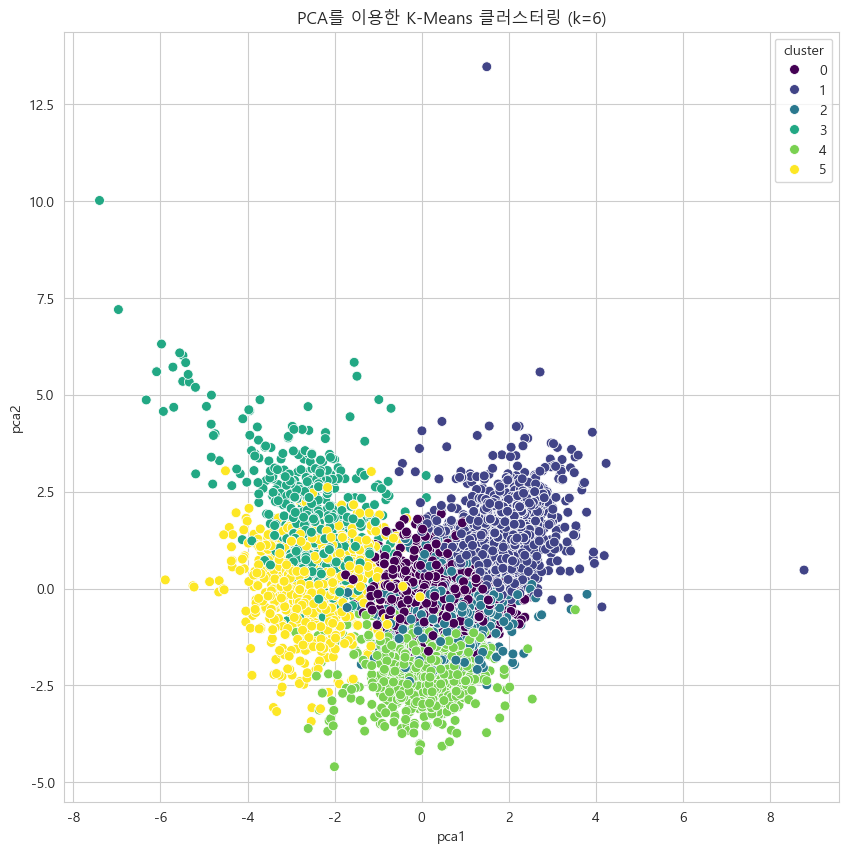

In [3]:
import numpy as np
import seaborn as sns

# ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò ÏÑ§Ï†ï (Ïòà: 6)
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïóê ÌÅ¥Îü¨Ïä§ÌÑ∞ Î†àÏù¥Î∏î Ï∂îÍ∞Ä
data['cluster'] = labels

# Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑù(PCA)ÏùÑ ÌÜµÌïú 2D ÏãúÍ∞ÅÌôî
# Ï∞®ÏõêÏù¥ Í≥†Ï∞®Ïõê -> Ï†ÄÏ∞®Ïõê Ï∞®Ïõê Ï∂ïÏÜå Í∏∞Î≤ï,
# Ïòà) ÌäπÏßï ÏôÄÏù∏ Îì±Í∏â ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÏöîÏÜå , ÎèÖÎ¶ΩÎ≥ÄÏàò,
# ÎèÖÎ¶ΩÎ≥ÄÏàò, ÏïΩ 11Í∞ú. -> 11Ï∞®Ïõê, Î∂ÑÏÑùÏùÑ ÌïòÎ©¥, ÏÑ±Îä•ÎèÑ ÎÇòÏÅòÎã§. ,
# 2Í∞ú, 3Í∞ú Ï†ïÎèÑ, 2D, 3D Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌï®. ÏµúÎåÄÌïú ÏõêÎûò Í∞íÏùò ÌäπÏÑ±ÏùÑ Ïú†ÏßÄ Ìï†Î†§Í≥†
# ÌïúÏÉÅÌÉúÏóêÏÑú, Ï∂ïÏÜåÌï®. -> Ï¢åÌëú ÌèâÎ™ÖÏóê ÎÇòÌÉÄÎÇºÏàò ÏûàÏùå.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
data['pca1'] = components[:, 0]
data['pca2'] = components[:, 1]

plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='pca1', y='pca2', hue='cluster', palette='viridis', s=50)
plt.title(f'PCAÎ•º Ïù¥Ïö©Ìïú K-Means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (k={optimal_k})')
plt.show()


In [4]:
# ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ Ï†ïÏùò (Ïòà: ÏûÑÏùòÏùò ÌôîÌïôÏ†Å ÌäπÏÑ± Í∞í)
sample_data = np.array([[7.4, 0.7, 0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]])

# ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
sample_data_scaled = scaler.transform(sample_data)

# ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏòàÏ∏°
sample_label = kmeans.predict(sample_data_scaled)

print(f"ÏÉòÌîå Îç∞Ïù¥ÌÑ∞Îäî ÌÅ¥Îü¨Ïä§ÌÑ∞ {sample_label[0]}Ïóê ÏÜçÌï©ÎãàÎã§.")


ÏÉòÌîå Îç∞Ïù¥ÌÑ∞Îäî ÌÅ¥Îü¨Ïä§ÌÑ∞ 5Ïóê ÏÜçÌï©ÎãàÎã§.


C:\Users\it\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Adjusted Rand Index (ARI) Í≥ÑÏÇ∞
ari_score = adjusted_rand_score(data['quality'], data['cluster'])

# Normalized Mutual Information (NMI) Í≥ÑÏÇ∞
nmi_score = normalized_mutual_info_score(data['quality'], data['cluster'])

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")


Adjusted Rand Index (ARI): 0.0353
Normalized Mutual Information (NMI): 0.0619


In [6]:
# üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥ºÎ•º Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
output_file_path = "./wine_clustering_results.csv"
# üìå ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÏÑ†ÌÉù
output_data = data[['type', 'quality', 'cluster']]
output_data.to_csv(output_file_path, index=False)

print(f"‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä Ìè¨Ìï®Îêú CSV ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: {output_file_path}")


‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä Ìè¨Ìï®Îêú CSV ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: ./wine_clustering_results.csv


In [7]:
from scipy.stats import mode

# üìå ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•ÌïòÎäî quality Í∞í Ï∞æÍ∏∞
cluster_to_quality = {}
for cluster in sorted(data['cluster'].unique()):
    # Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎÇ¥ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•ÌïòÎäî quality Í∞í Ï∞æÍ∏∞
    most_common_quality = mode(data[data['cluster'] == cluster]['quality'], keepdims=True).mode[0]
    cluster_to_quality[cluster] = most_common_quality

# üìå Îß§ÌïëÎêú ÌÅ¥Îü¨Ïä§ÌÑ∞ ‚Üí ÌíàÏßà Ï∂úÎ†•
print("üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ ‚Üí ÎåÄÌëú ÌíàÏßà Îß§Ìïë:")
for cluster, quality in cluster_to_quality.items():
    print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster} ‚Üí ÌíàÏßà {quality}")


üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ ‚Üí ÎåÄÌëú ÌíàÏßà Îß§Ìïë:
ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 ‚Üí ÌíàÏßà 6
ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 ‚Üí ÌíàÏßà 5
ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 ‚Üí ÌíàÏßà 6
ÌÅ¥Îü¨Ïä§ÌÑ∞ 3 ‚Üí ÌíàÏßà 6
ÌÅ¥Îü¨Ïä§ÌÑ∞ 4 ‚Üí ÌíàÏßà 6
ÌÅ¥Îü¨Ïä§ÌÑ∞ 5 ‚Üí ÌíàÏßà 5
